<a href="https://colab.research.google.com/github/jirattha2012/Face-Detection-JavaScript/blob/master/iot_decission_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation


Loading Data

In [ ]:
col_names = ['timestamp', 'Temperature', 'Humidity', 'SoilMoisture', 'Irrigation']
# load dataset
df = pd.read_csv("iot-water irrigation.csv", header=None, names=col_names,skiprows=1)


In [ ]:
df.head()


,timestamp,Temperature,Humidity,SoilMoisture,Irrigation
0,5/1/2023 8:00,25,70,40,Yes
1,5/1/2023 9:00,26,68,38,No
2,5/1/2023 10:00,27,65,36,No
3,5/1/2023 11:00,28,63,34,Yes
4,5/1/2023 12:00,30,62,33,No


Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ['Temperature', 'Humidity', 'SoilMoisture']
X = df[feature_cols] # Features
y = df.Irrigation # Target variable

In [ ]:
y = df.Irrigation.map({'Yes': 1, 'No': 0})

In [ ]:
print(y.isnull().sum())

0


Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


Building Decision Tree Model

Let's create a decision tree model using Scikit-learn.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


Evaluating the Model

Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


Visualizing Decision Trees

In [ ]:
!pip install graphviz

!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

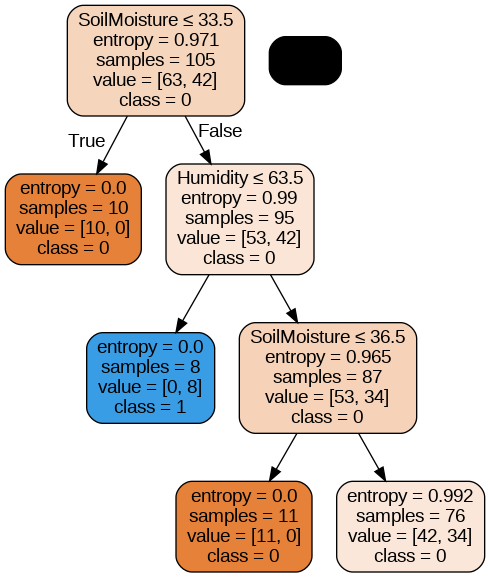

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('waterirrigation.png')
Image(graph.create_png())


Optimizing Decision Tree Performance

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5652173913043478


Code Adapt From  https://vprhlabs.blogspot.com/p/iptables-configuration-for-squid.html